In [1]:
import pandas as pd

# Load the dataset
file_path = 'spambase.data.shuffled'
data = pd.read_csv(file_path, header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.08,0.17,0.17,0.0,0.80,0.08,0.00,0.26,0.00,0.00,...,0.023,0.046,0.0,0.000,0.023,0.0,2.658,57,436,0
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.0,1.769,8,23,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.16,0.00,...,0.000,0.000,0.0,0.000,0.000,0.0,1.200,3,12,0
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.38,...,0.000,0.000,0.0,0.442,0.000,0.0,2.125,10,17,0
4,0.00,0.00,0.32,0.0,0.65,0.65,0.32,0.32,0.00,0.00,...,0.000,0.106,0.0,0.000,0.159,0.0,1.494,10,139,1


In [2]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3680, 57), (921, 57), (3680,), (921,))

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# set up
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

T_values = [10**ii for ii in range(1,5)]

avg_errors = []
std_errors = []

for T in T_values:
    print('T =', T)
    errors = []

    for train_index, val_index in kfold.split(X_train):
        # Splitting the data into training and validation sets
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Initialize AdaBoost Classifier with T estimators
        model = AdaBoostClassifier(n_estimators=T, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation set and calculate error
        y_pred_val = model.predict(X_val_fold)
        error = 1 - accuracy_score(y_val_fold, y_pred_val)
        errors.append(error)

    # Calculate average and standard deviation of errors for this T
    avg_errors.append(np.mean(errors))
    std_errors.append(np.std(errors))

    print('Errors:', errors)


T = 10
Errors: [0.07608695652173914, 0.08695652173913049, 0.0842391304347826, 0.11141304347826086, 0.11956521739130432, 0.07608695652173914, 0.08967391304347827, 0.08967391304347827, 0.0842391304347826, 0.07336956521739135]
T = 100
Errors: [0.057065217391304324, 0.0625, 0.07336956521739135, 0.08152173913043481, 0.08152173913043481, 0.03260869565217395, 0.05978260869565222, 0.07608695652173914, 0.05434782608695654, 0.057065217391304324]
T = 1000
Errors: [0.05978260869565222, 0.0625, 0.07065217391304346, 0.07880434782608692, 0.07880434782608692, 0.057065217391304324, 0.06521739130434778, 0.06793478260869568, 0.05434782608695654, 0.05978260869565222]
T = 10000
Errors: [0.05978260869565222, 0.06521739130434778, 0.08152173913043481, 0.07608695652173914, 0.09782608695652173, 0.05978260869565222, 0.07880434782608692, 0.07336956521739135, 0.05163043478260865, 0.07608695652173914]


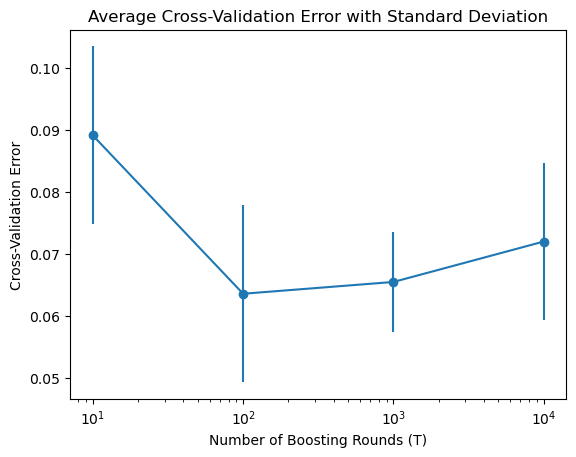

([0.08913043478260871,
  0.06358695652173915,
  0.0654891304347826,
  0.07201086956521739],
 [0.01436880876782856,
  0.014286347204450997,
  0.008102201910801923,
  0.012643902308838958],
 [10, 100, 1000, 10000])

In [12]:
# Plot
plt.errorbar(T_values, avg_errors, yerr=std_errors, fmt='-o')
plt.xlabel('Number of Boosting Rounds (T)')
plt.ylabel('Cross-Validation Error')
plt.title('Average Cross-Validation Error with Standard Deviation')
plt.xscale('log')
plt.show()

avg_errors, std_errors, T_values